In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv("https://raw.githubusercontent.com/cior666/Machine-Learning-III-entrega/refs/heads/main/Data%20discovery/CarPricing_clean.csv")

In [29]:
df.describe()

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode,target
count,371528.000000,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000,371528.000000
mean,185763.500000,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764,0.193792
std,107251.039743,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247,0.395268
min,0.000000,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000,0.000000
25%,92881.750000,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000,0.000000
50%,185763.500000,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000,0.000000
75%,278645.250000,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000,0.000000
max,371527.000000,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000,1.000000


In [30]:
df['target'].dtype, df['target'].value_counts(dropna=False)


(dtype('int64'),
 target
 0    299529
 1     71999
 Name: count, dtype: int64)

In [32]:
target_counts=df.target.value_counts()

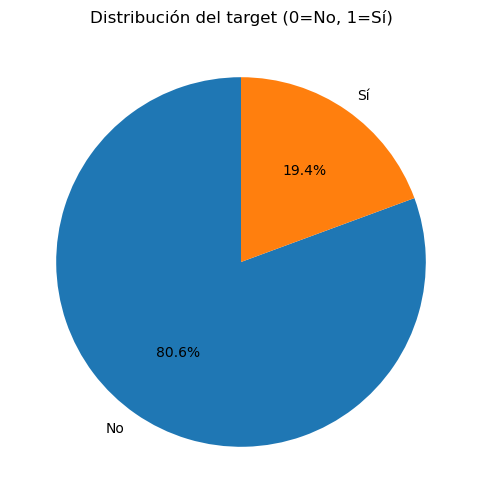

In [33]:
labels = target_counts.index.map({0:"No", 1:"Sí", np.nan:"NaN"})
plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=labels, autopct="%1.1f%%", startangle=90)
plt.gca().set_aspect('equal')
plt.title("Distribución del target (0=No, 1=Sí)")
plt.show()

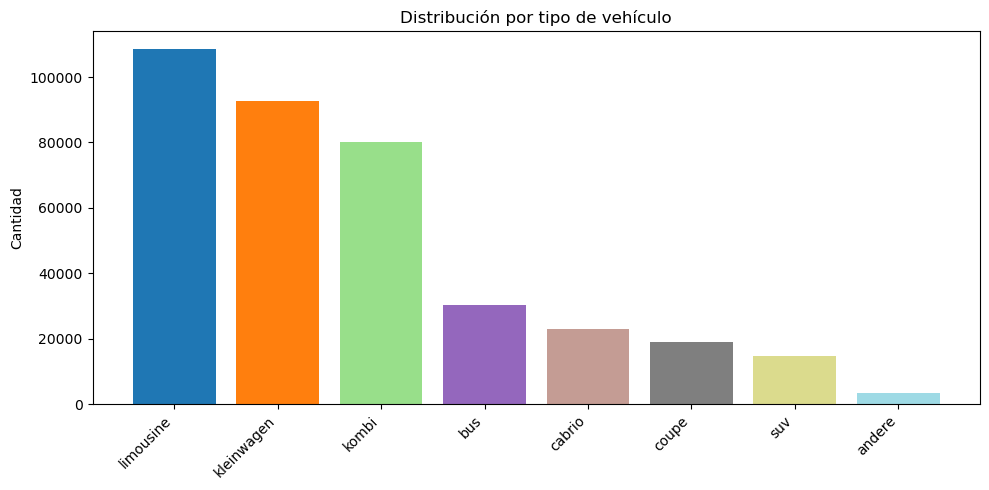

In [34]:
#Distribucion por tipo de vehiculo
vc = df['vehicleType'].value_counts()

plt.figure(figsize=(10,5))
colors = plt.cm.tab20(np.linspace(0, 1, len(vc)))  # paleta con colores distintos
plt.bar(vc.index, vc.values, color=colors)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cantidad')
plt.title('Distribución por tipo de vehículo')
plt.tight_layout()
plt.show()

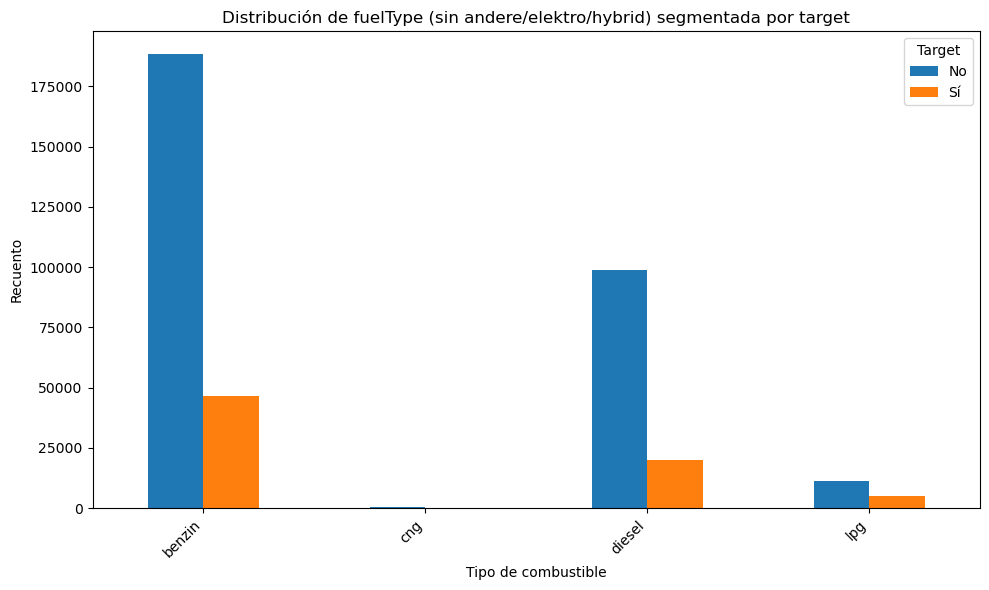

In [37]:
ct = pd.crosstab(df['fuelType'], df['target']).rename(columns={0:'No', 1:'Sí'})
ct = ct.drop(index=[c for c in ['andere','elektro','hybrid'] if c in ct.index])
ax = ct.plot(kind='bar', figsize=(10,6))
plt.title('Distribución de fuelType (sin andere/elektro/hybrid) segmentada por target')
plt.xlabel('Tipo de combustible'); plt.ylabel('Recuento')
plt.xticks(rotation=45, ha='right'); plt.legend(title='Target')
plt.tight_layout(); plt.show()

In [15]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols = [c for c in numeric_cols if c.lower() != 'index']

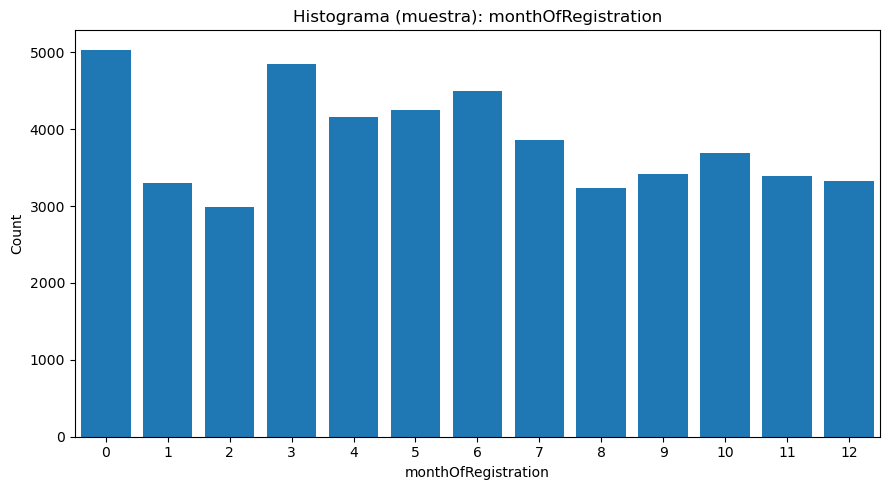

In [ ]:
sample = df.sample(50_000, random_state=0)

vc = sample['monthOfRegistration'].value_counts().sort_index(ascending=False)
plt.figure(figsize=(9,5))
plt.bar(vc.index.astype(int), vc.values)
plt.title("Histograma (muestra): monthOfRegistration")
plt.xlabel("monthOfRegistration"); plt.ylabel("Count")
plt.xticks(sorted(vc.index, reverse=True))
plt.gca().set_xlim(-0.5, 12.5)  
plt.tight_layout()
plt.show()

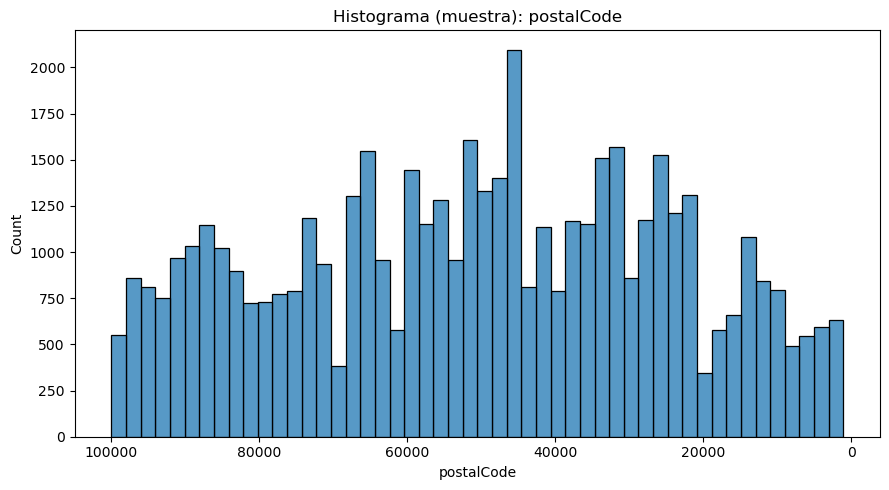

In [ ]:
plt.figure(figsize=(9,5))
sns.histplot(sample['postalCode'], bins=50, kde=False)
plt.title("Histograma (muestra): postalCode")
plt.xlabel("postalCode"); plt.ylabel("Count")
plt.gca().invert_xaxis()         
plt.tight_layout()
plt.show()

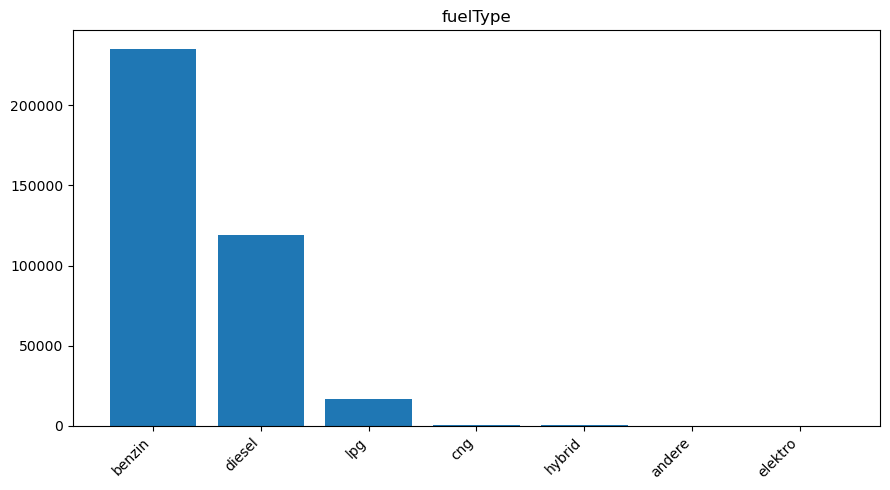

In [6]:
vc = df['fuelType'].value_counts()
plt.figure(figsize=(9,5))
plt.bar(vc.index, vc.values)
plt.xticks(rotation=45, ha='right')
plt.title('fuelType')
plt.tight_layout(); plt.show()

In [13]:
df.columns

Index(['index', 'dateCrawled', 'name', 'seller', 'offerType', 'price',
       'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen', 'target'],
      dtype='object')

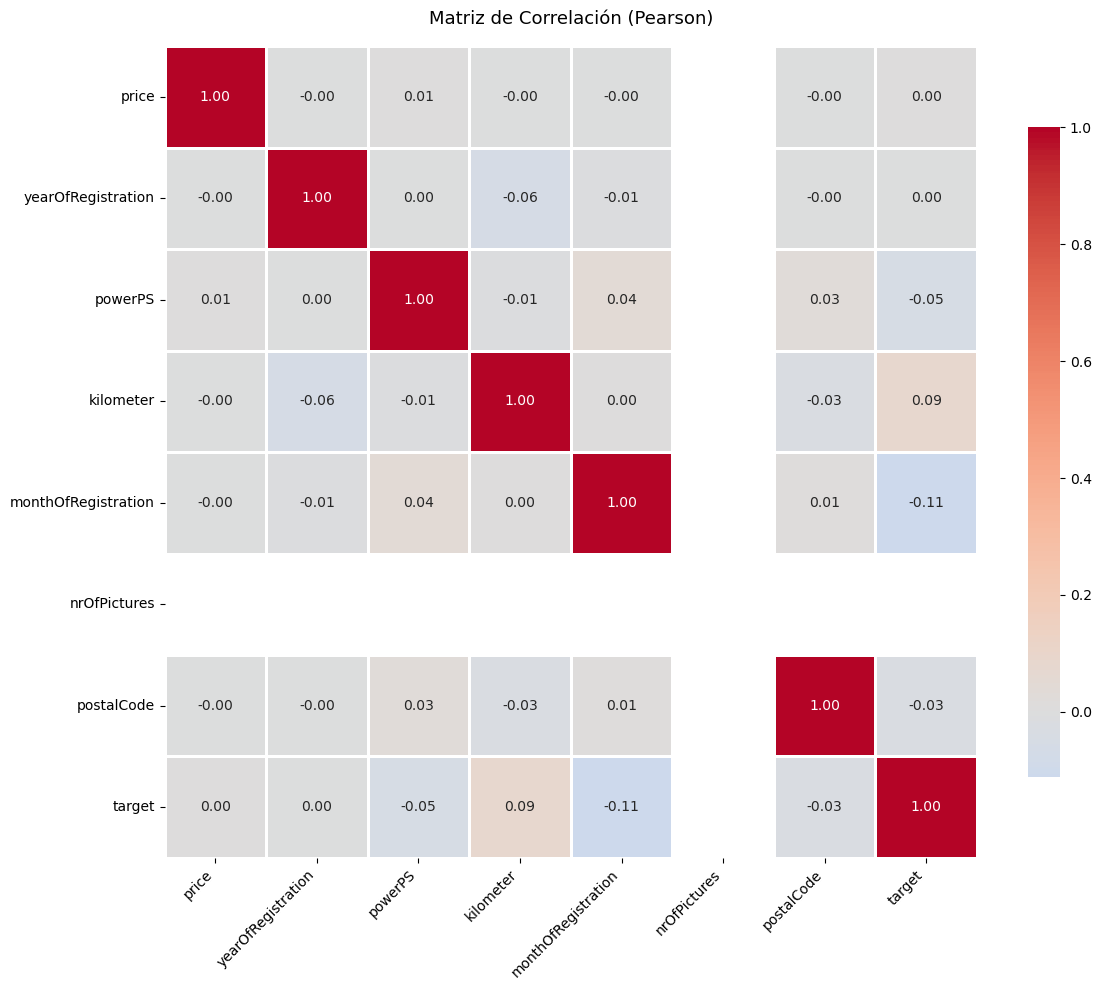

In [18]:
corr_matrix = df[numeric_cols].corr(method="pearson")
plt.figure(figsize=(12, 10))

sns.heatmap(
    corr_matrix, 
    annot=True,          
    fmt=".2f",           
    cmap="coolwarm",     
    center=0,            
    linewidths=0.8,      
    cbar_kws={"shrink": .8}  
)

plt.title("Matriz de Correlación (Pearson)", fontsize=13, pad=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:

#Lo que nos muestra esta matriz de pearson es que no existen y si 
#existen son muy bajas las relaciones lineales entre las variables
#analizadas. Entonces debemos optar por un modelo de relaciones
#no lineales o variables categoricas

In [19]:
X = df.drop(columns=['target'])
y = df['target']

In [20]:
num_features = X.select_dtypes(include=['number']).columns.tolist()
cat_features = X.select_dtypes(exclude=['number']).columns.tolist()

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)



NameError: name 'ColumnTransformer' is not defined